# Modules to be imported

Necessary modules for the correct operation of the script:

In [1]:
import comands as co
import load as ld
import matplotlib.pyplot as plt
from matplotlib import collections as mc

# Loading the data you need

Below is an example of how to load data using the LoadAndFind class located in the load module:

```
ld.load_data('./data/sdB93.dane' ,'p')
```

First, make variable for load:

1. Select the data you prefer,
2. Select the p (python) or f (fortran) method.

We need the noise level to plot on the graph. If you want more information about a module, function or variable method, use the command * help (load) *. Likewise, you have the option to load other data such as frequency, peaks, etc.

In [2]:
data = ld.load_data('./data/sdB93.dane', 'p')
frequencies, ppt, noise, peaks, height, peak_position, periods , peaks_periods = data[0], data[1], data[2], data[3], data[4], data[5], data[6], data[7]

# Fourier transformation with fortran files (optional)

Another way to calculate the Fourier transform without a python:

   1. Uncomment below the line,
   2. Perform a Fourier transform function from co modules to compute given Fourier transform,
   3. Evaluate the compute_level on the basis of the modules.

In [3]:
# co.fourier_transformation(' ./data/sdB93.dane') 

In [4]:
# noise = co.calculate_the_noise_level()

When selecting this method, make the above two cells first before loading the data.

# Plotting data 

This generates an ipywidget that renders plots in a control. Multiple plots and zooming are supported:

In [5]:
%matplotlib widget

## Plotting chart with variable level noise

The other way only shows a different noise floor for split data. First, do the split class from the load module:

In [6]:
Split = ld.SplitData('./data/sdB93.dane', 'p')

The amplitude spectrum of a red pulsating star with varying blue detection levels:

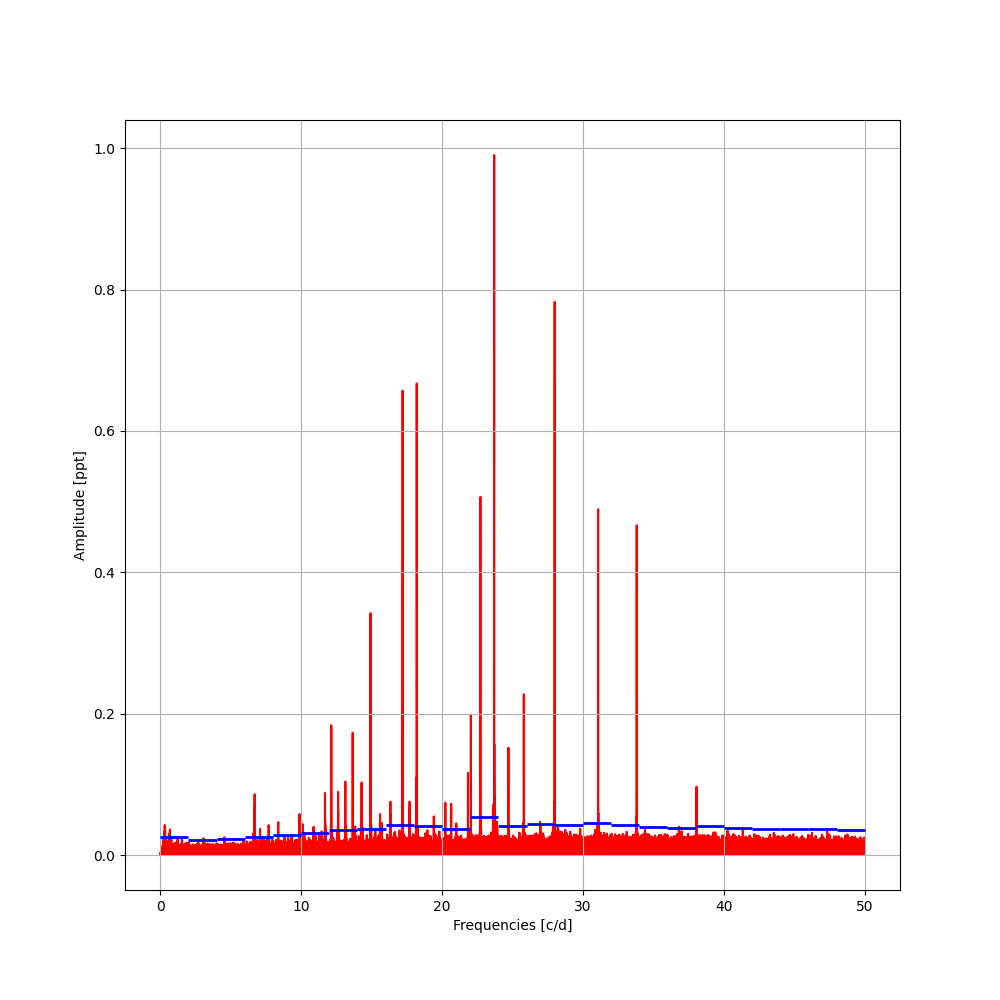

In [7]:
figure_0 = plt.figure(figsize=(10, 10))
axis_0 = figure_0.subplots()
axis_0.set(xlabel='Frequencies [c/d]', ylabel='Amplitude [ppt]')
line_color = mc.LineCollection(Split.lines, colors='blue', linewidths=2)
axis_0.add_collection(line_color)
axis_0.autoscale()
axis_0.grid()
axis_0.plot(frequencies, ppt, color='red', zorder=-10)

## Plotting chart with one level noise 

The amplitude spectrum of a pulsating star in red with the detection level in blue:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


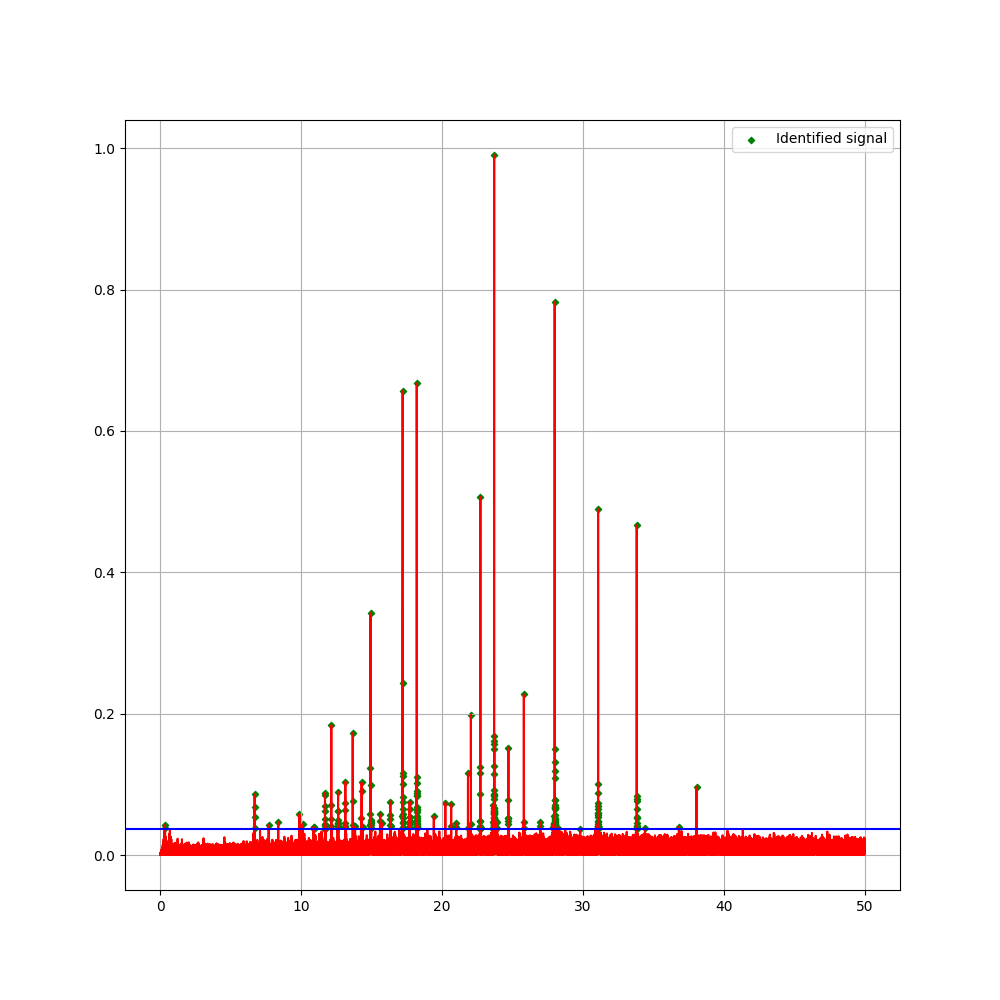

In [8]:
figure_1 = plt.figure(figsize=(10, 10))
axis_1 = figure_1.subplots()
axis_1.plot(frequencies, ppt, color='red')
axis_1.scatter(peak_position, height, color='g', s=10, marker='D', label='Identified signal')
axis_1.axhline(y=noise, color='blue', linestyle='-', linewidth=1.5)
axis_1.legend()
axis_1.grid()
plt.savefig('./output/transformat_fourier_frequencies_with_noise.eps', format='eps')

##  Plotting maxima in periods

Converted spectrum of Fourier transform with plotted signals:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


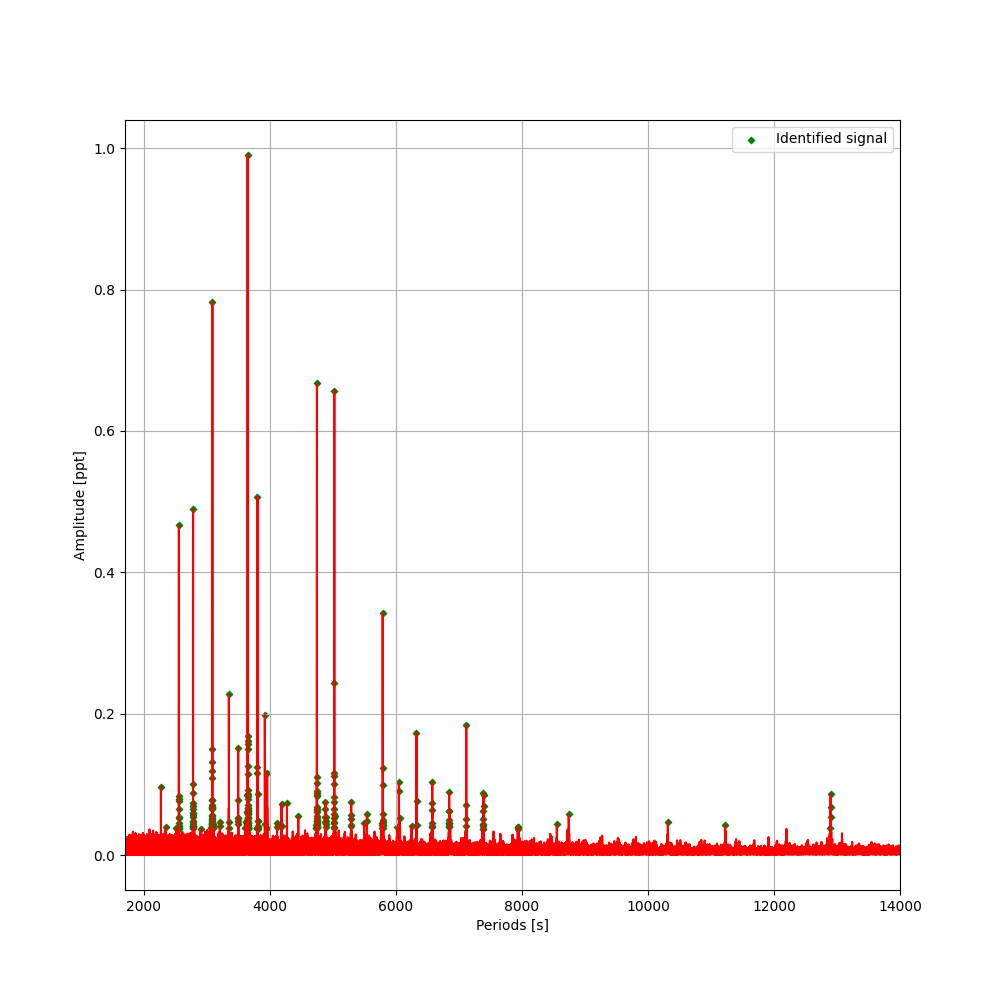

In [9]:
figure_2 = plt.figure(figsize=(10, 10))
axis_2 = figure_2.subplots()
axis_2.plot(periods[-575000:], ppt[-575000:], color='red')
axis_2.scatter(peaks_periods[2:], height[2:], color ='green', s =10, marker ='D', label ='Identified signal')
axis_2.set(xlabel='Periods [s]', ylabel='Amplitude [ppt]')
axis_2.set_xlim(1700,14000)
axis_2.legend()
axis_2.grid()
plt.savefig('./output/identified_signal_in_period.eps', format='eps')

## Plotting histogram to all data 

To draw histograms, you need to execute the DistanceAndHistograms class from the load module:

In [10]:
Histograms = ld.DistanceAndHistograms('./data/sdB93.dane', 'p')

The next step is to load the limiting data with the limiting function into the histogram for distances from 20 to 600:

In [11]:
limiting_data = Histograms.limiting(20, 600)

A histogram that shows the distance distribution for the data:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


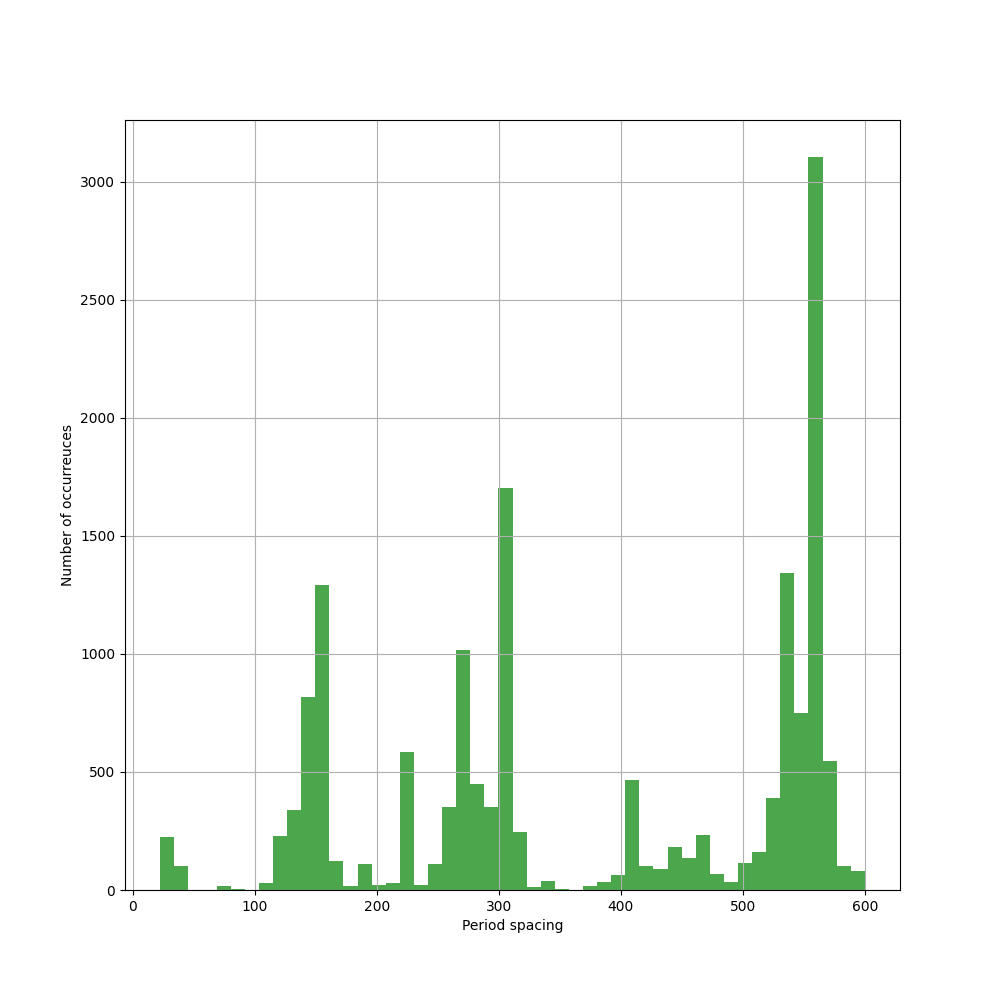

In [12]:
figure_3 = plt.figure(figsize=(10, 10))
axis_3 = figure_3.subplots()
axis_3.hist(limiting_data, bins=50, alpha=0.7, facecolor='green')
axis_3.set_xlabel('Period spacing')
axis_3.set_ylabel('Number of occurreuces')
axis_3.grid()
plt.savefig('./output/histogram_to_all_data.eps', format='eps')

## Potting histograms to $l_2$ (140 seconds distanse)

The predicted value for $l_2$ (140) is in the range from 100 to 300. We limit the same with the use of the limitting function:

In [13]:
limiting_data_1 = Histograms.limiting(100, 300)

The gauss function will be matched to the histogram for identification. The matching parameters obtained in this way are defined below:

In [14]:
xfit_1, yfit_1, x0_1, sigma_1 = Histograms.fitting_gauss(limiting_data_1, start_interval=0.03, end_interval=0.5, start_point_fit=120, end_point_fit=190)

Histogram showing the distance distribution for $l_2$  with fitted Gaussian function in the range from 120 to 190 seconds:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


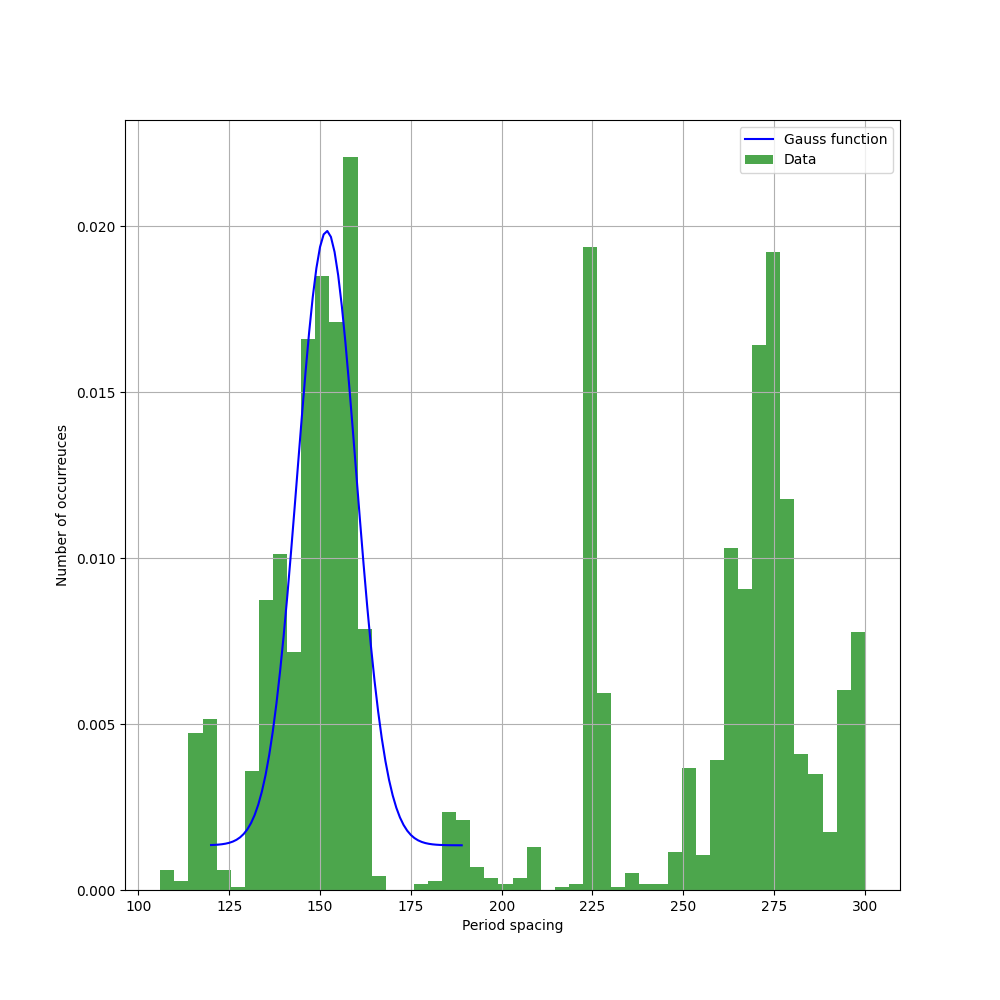

In [15]:
figure_4 = plt.figure(figsize=(10, 10)) #plotting result
axis_4 = figure_4.subplots()
axis_4.hist(limiting_data_1, bins=50, density=1, alpha=0.7, facecolor='green')
axis_4.plot(xfit_1, yfit_1, color='blue')
axis_4.set(xlabel='Period spacing', ylabel='Number of occurreuces', title=None)
axis_4.grid()
axis_4.legend(labels=['Gauss function', 'Data'])
plt.savefig('./output/histogram_l2_gauss.eps', format='eps')

## Potting histograms to $l_1$ (250 seconds distanse)

Same as before. The predicted value for $l_1$ (250) is in the range from 200 to 350. We limit the same with the use of the limitting function:

In [16]:
limiting_data_2 = Histograms.limiting(200, 350)

The matching parameters obtained in this way are defined below:

In [17]:
xfit_2, yfit_2, x0_2, sigma_2 = Histograms.fitting_gauss(limiting_data_2, start_interval=0.2, end_interval=0.7, start_point_fit=240, end_point_fit=300)

Histogram showing the distance distribution for $l_1$ with fitted Gaussian function over the range 240 to 300 seconds

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


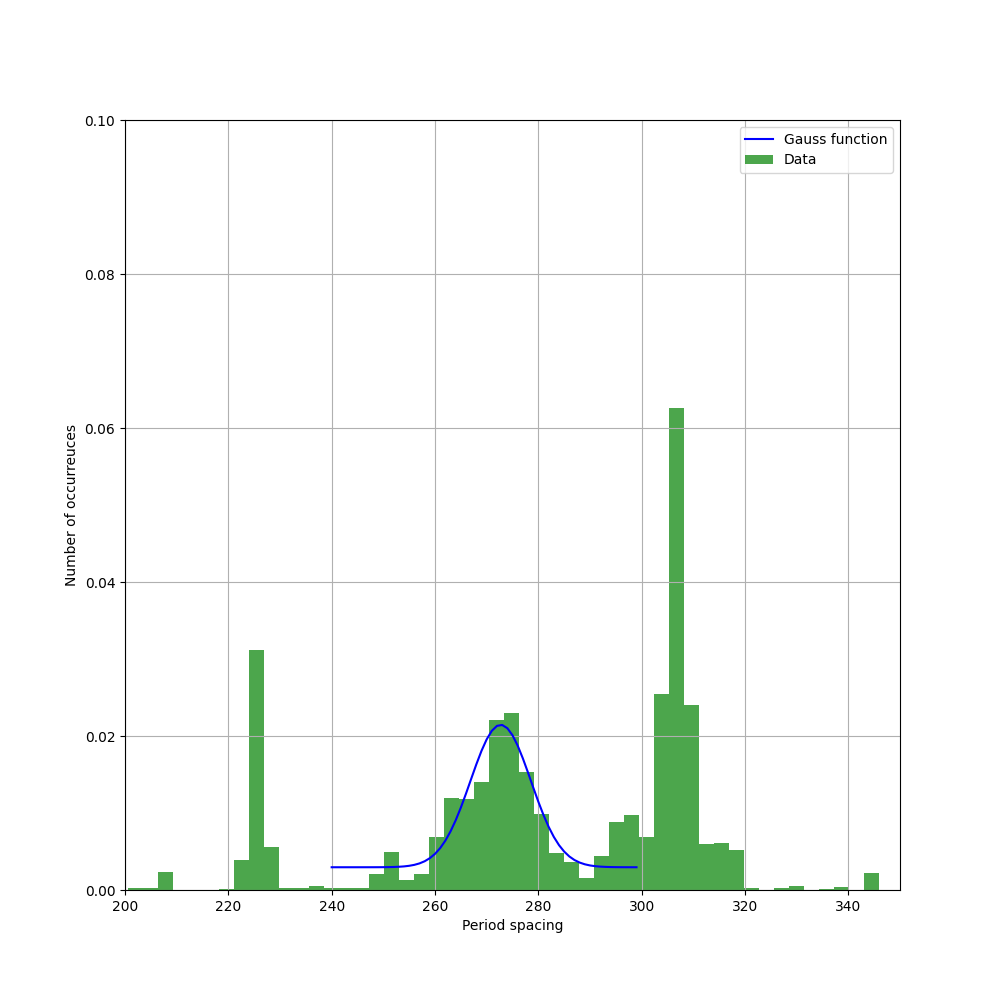

In [18]:
figure_5 = plt.figure(figsize=(10, 10)) #plotting result
axis_5 = figure_5.subplots()
axis_5.hist(limiting_data_2, bins=50, density=1, alpha=0.7, facecolor='green')
axis_5.plot(xfit_2, yfit_2, color='blue')
axis_5.set(xlabel='Period spacing', ylabel='Number of occurreuces', title=None)
axis_5.set_xlim(200, 350)
axis_5.set_ylim(0, 0.1)
axis_5.grid()
axis_5.legend(labels=['Gauss function', 'Data'])
plt.savefig('./output/histogram_l1_gauss.eps', format='eps')

## Potting histograms to $l_3$ if exist (80 seconds distanse)

Obligatory because such mods do not always exist. It should be identified even for a small number of mods as below. The predicted value for $l_3$ (80) is in the range from 50 to 100. We limit the same with the use of the limitting function:

In [19]:
limiting_data_3 = Histograms.limiting(50, 100)

Matching parameters are:

In [20]:
xfit_3, yfit_3, x0_3, sigma_3 = Histograms.fitting_gauss(limiting_data_3, start_interval=0.1, end_interval=0.7, start_point_fit=70, end_point_fit=85, bins=15)

Histogram showing the distance distribution number for $l_3$ with fitted Gaussian function in the range from 70 to 85 seconds:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


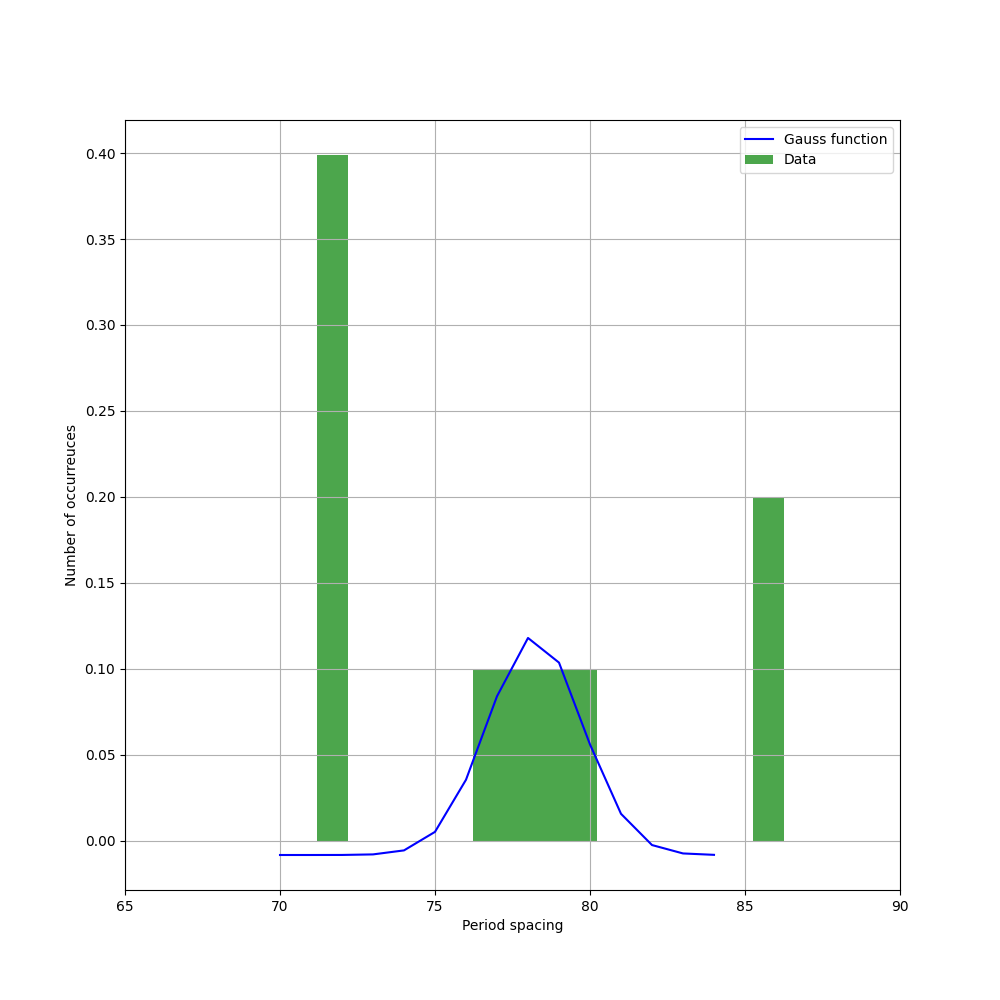

In [21]:
figure_6 = plt.figure(figsize=(10, 10)) #plotting result
axis_6 = figure_6.subplots()
axis_6.hist(limiting_data_3, bins=15, density=1, alpha=0.7, facecolor='green')
axis_6.plot(xfit_3, yfit_3, color='blue')
axis_6.set(xlabel='Period spacing', ylabel='Number of occurreuces', title=None)
axis_6.grid()
axis_6.legend(labels=['Gauss function', 'Data'])
axis_6.set_xlim([65, 90])
plt.savefig('./output/histogram_l3_gauss.eps', format='eps')

# Assigning the values of $l_1$, $l_2$ and $l_3$ to the individual peaks

The next step is to use the resulting fitted parameters to identify which of the individual peaks is a given l number. So you need to execute the mods function from the load module:

In [22]:
list_of_numbers_l = ld.mods(x0_1, sigma_1, x0_2, sigma_2, x0_3, sigma_3, peaks_periods, './data/sdB93.dane', 'p')
list_of_numbers_l_3 = list_of_numbers_l.loc[lambda list_of_munbers_l: list_of_numbers_l[3] == '3 ']

In addition, the list above has been divided into two separate lists with individual numbers l. A distance ladder is drawn below, which is used to visually compare the results obtained by python (more information in theory). Converted amplitude spectrum with marked signal modes:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


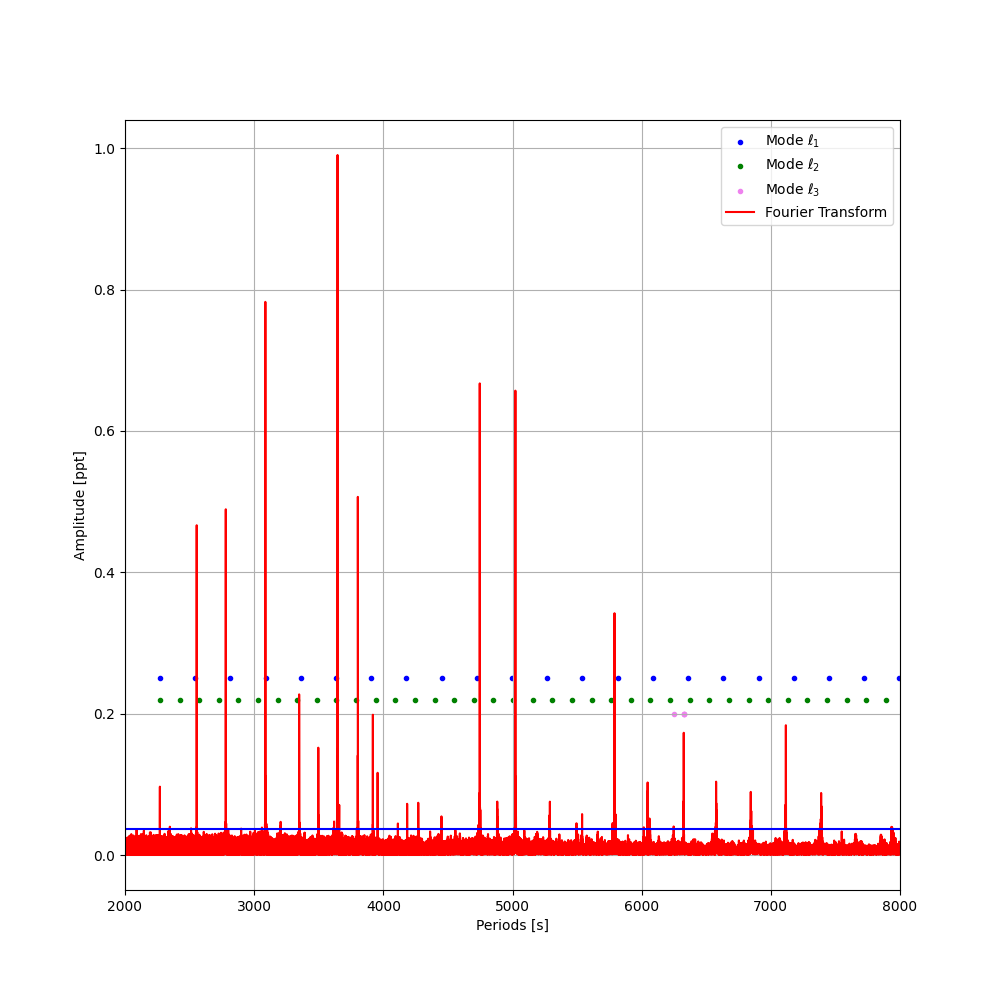

In [23]:
figure_7 = plt.figure(figsize=(10, 10)) 
axis_7 = figure_7.subplots()

list_of_l_1_x = list()
list_of_l_1_y = list()
for i in range(64):
    list_of_l_1_x.append(min(peaks_periods) + i * 272.62)  # start from the first identified peak adding the mean value (272.62) of the identified mode
    list_of_l_1_y.append(0.25)  # at 0.25 in the chart

list_of_l_2_x = list()
list_of_l_2_y = list()
for i in range(56):
    list_of_l_2_x.append(min(peaks_periods) + i * 151.92)  # start from the first identified peak adding the mean value (151.92) of the identified mode
    list_of_l_2_y.append(0.22)  # at 0.22 in the chart

list_of_l_3_x = list_of_numbers_l_3[:4][1]
list_of_l_3_y = [0.20] * 4  # at 0.20 in the chart

axis_7.scatter(list_of_l_1_x, list_of_l_1_y, marker='.', color='blue', label='Mode $\ell_1$')
axis_7.scatter(list_of_l_2_x, list_of_l_2_y, marker='.', color='green', label='Mode $\ell_2$')
axis_7.scatter(list_of_l_3_x, list_of_l_3_y, marker='.', color='violet', label='Mode $\ell_3$')
axis_7.plot(periods[-590000:], ppt[-590000:], label='Fourier Transform', color='red')
axis_7.axhline(y=noise, color='blue', linestyle='-', linewidth=1.5)
axis_7.set_xlim([2000, 8000])
axis_7.grid()
axis_7.set_xlabel("Periods [s]")
axis_7.set_ylabel("Amplitude [ppt]")
axis_7.legend()
plt.savefig('./output/ladder.eps', format='eps')

# Corfirmation of correct designation 

To obtain a chart confirming the results, execute the confirm class from the load module:

In [24]:
Confirm = ld.Confirm('./data/sdB93.dane', 'p')

Then execute the data processing function for confirmation:

In [25]:
load_data = Confirm.run_fourier_transformation_to_confirm()

/usr/lib/python3/dist-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


Fourier transform confirming the determination of $ \Pi $ with marked maxima of $\sigma_1$, $\sigma_2$ histograms for each identified signal:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


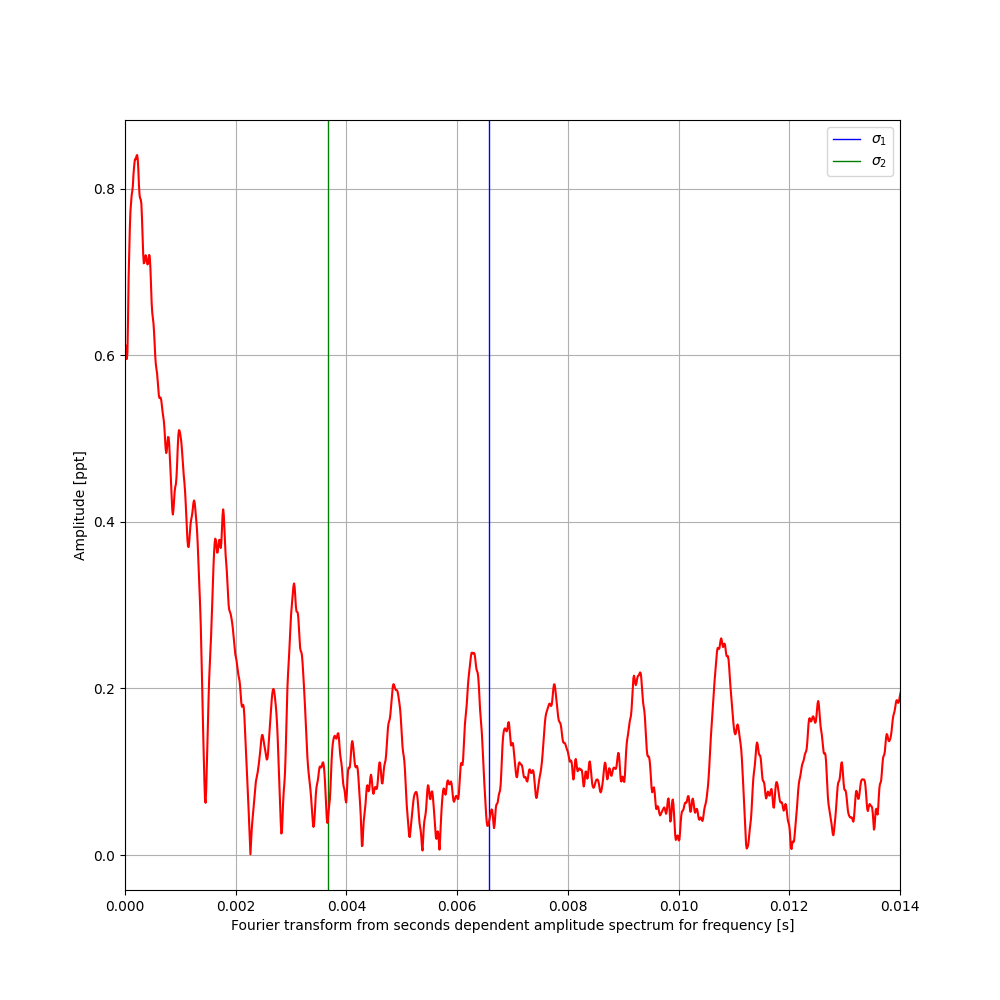

In [26]:
figure_8 = plt.figure(figsize=(10, 10))
axis_8 = figure_8.subplots()
axis_8.set_xlim(0, 0.014)
axis_8.axvline(x=1 / 151.92, color='b', linestyle='-', linewidth=1, label='$\sigma_{1}$')
axis_8.axvline(x=1 / 272.62, color='g', linestyle='-', linewidth=1, label='$\sigma_{2}$')
axis_8.set_xlabel('Fourier transform from seconds dependent amplitude spectrum for frequency [s]')
axis_8.set_ylabel('Amplitude [ppt]')
axis_8.legend()
axis_8.grid()
axis_8.plot(load_data[0], load_data[1], color='red')
plt.savefig('./output/confirm_plot.eps', format='eps')